# Приоритизация гипотез. Проведение и анализ A/B теста

**Представим себя в качестве аналитика крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.**

**Для проведения данного исследования нам предоставлен датасет с гипотезами, где содержится краткая информация о каждой гипотезе и показатели Reach, Impact, Confidence, Efforts (эти данные пригодятся для приоритизации гипотез); также в нашем распоряжении имеются датасеты с информацией о заказах и с информацией о пользователях, которые понадобятся нам для проведения A/B теста.**

**Цель проекта: приоритизировать гипотезы, запустить A/B-тест и проанализировать полученные результаты.**

**План работы:<br>
Сначала нам потребуется провести предобработку предоставленных нам данных, проверить на наличие пропусков и дубликатов, изменить тип данных где это необходимо. Затем мы займемся приоритизацией гипотез с помощью фреймворков ICE и RICE. После этого мы перейдем к анализу A/B теста. Для этого мы выполним следующие задачи:<br>
1). Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.<br>
2). Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.<br>
3). Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.<br>
4). Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.<br>
5). Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.<br>
6). Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.<br>
7). Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.<br>
8). Построим точечный график стоимостей заказов. Сделаем выводы и предположения.<br>
9). Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.<br>
10). Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.<br>
11). Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.<br>
12). Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.<br>
13). Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.<br>
14). Примем решение по результатам теста и аргументируем его.**

## Загрузка данных

In [3]:
#импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats

**Загрузим датасет с информацией о гипотезах для первичного ознакомления.**

In [4]:
absolute_path1 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Приоритизация гипотез. Проведение и анализ AB теста\hypothesis.csv'
hypothesis = pd.read_csv(absolute_path1)

# Установим опцию отображения максимальной ширины столбцов
pd.options.display.max_colwidth = 400
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


**Таблица состоит из 5 колонок и 9 строк, пропущенных значений нет, типы данных в порядке и соответствуют содержимому. Нам следует только привести названия столбцов к нижнему регистру.**

## Предобработка данных

In [6]:
# Приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Теперь мы можем перейти к приоритизации гипотез.**

## Приоритизация гипотез

**Для выявления наиболее перспективных гипотез нам понадобятся следующие параметры из датафрейма "hypothesis":<br>
Reach — скольких пользователей затронет изменение, которое мы хотим внести;<br>
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;<br>
Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так;<br>
Efforts — сколько стоит протестировать эту гипотезу.**

In [7]:
# применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.sort_values(by= 'ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


**Итак, выходит, что самая перспективная гипотеза - 8, далее идут 0, 7 и 6.**

In [8]:
# применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


**Теперь у нас получается, что самыми многообещающими являются гипотезы под номером 7, а также 2, 0 и 6. Это произошло из-за того, что теперь для расчета мы использовали параметр Reach, указывающий,  скольких пользователей затронет изменение, которое мы хотим внести.**

**На основе проведенной приоритизации можем сделать вывод, что нам стоит проверить гипотезы под номерами 7, 0 и 6.**

## Анализ A/B-теста

In [9]:
# загрузим датасет с заказами и ознакомимся с ним
absolute_path2 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Приоритизация гипотез. Проведение и анализ AB теста\orders.csv'
orders = pd.read_csv(absolute_path2)
orders.head(7)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


**Таблица состоит из 5 колонок и 1197 строк. Пропущенных значений нет.**

In [11]:
#поменяем тип данных столбца 'date'
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'].dtype

dtype('<M8[ns]')

In [12]:
# проверим столбец 'transactionId' на наличие дубликатов
orders[orders['transactionId'].duplicated()]

,transactionId,visitorId,date,revenue,group


In [13]:
# проверим весь датафрейм 'orders' на наличие полных дубликатов
orders[orders.duplicated()]

,transactionId,visitorId,date,revenue,group


**Нам следует проверить, не получилось ли так, что один и тот же пользователь оказался одновременно и в группе А, и в группе B.**

In [14]:
duplicate_users = orders.groupby('visitorId')['group'].nunique()
duplicate_users = duplicate_users[duplicate_users > 1]
duplicate_users

visitorId
8300375       2
199603092     2
232979603     2
237748145     2
276558944     2
351125977     2
393266494     2
457167155     2
471551937     2
477780734     2
818047933     2
963407295     2
1230306981    2
1294878855    2
1316129916    2
1333886533    2
1404934699    2
1602967004    2
1614305549    2
1648269707    2
1668030113    2
1738359350    2
1801183820    2
1959144690    2
2038680547    2
2044997962    2
2378935119    2
2458001652    2
2579882178    2
2587333274    2
2600415354    2
2654030115    2
2686716486    2
2712142231    2
2716752286    2
2780786433    2
2927087541    2
2949041841    2
2954449915    2
3062433592    2
3202540741    2
3234906277    2
3656415546    2
3717692402    2
3766097110    2
3803269165    2
3891541246    2
3941795274    2
3951559397    2
3957174400    2
3963646447    2
3972127743    2
3984495233    2
4069496402    2
4120364173    2
4186807279    2
4256040402    2
4266935830    2
Name: group, dtype: int64

In [15]:
#посчитаем, сколько всего таких дублирующихся пользователей
duplicate_users.count()

58

In [16]:
#посчитаем, сколько всего уникальных пользователей
orders.groupby('visitorId')['group'].nunique().count()

1031

**Так как 58 пользователей составляют 5.62% от всех пользователей, то мы можем удалить их, чтобы не искажать результаты A/B теста.**

In [17]:
# Получим индексы записей для дубликатов
duplicate_indexes = orders[orders['visitorId'].isin(duplicate_users.index)].index

# Удалим записи по индексам
orders.drop(duplicate_indexes, inplace=True)

In [18]:
# проверим, удалились ли дублирующиеся пользователи
orders.groupby('visitorId')['group'].nunique().count()

973

In [19]:
# убедимся, что в столбце 'group' нет никаких других значений, кроме A и B
orders['group'].unique()

array(['B', 'A'], dtype=object)

**С датасетом orders все в порядке, с ним можно работать. Перейдем к следующему датасету.**

In [21]:
absolute_path3 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Приоритизация гипотез. Проведение и анализ AB теста\visitors.csv'
visitors = pd.read_csv(absolute_path3)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Перед нами таблица, состоящая из 3 столбцов и 62 строк. Пропуски отсутствуют.**

In [23]:
#поменяем тип данных столбца 'date'
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'].dtype

dtype('<M8[ns]')

In [24]:
# проверим весь датафрейм 'visitors' на наличие полных дубликатов
visitors[visitors.duplicated()]

,date,group,visitors


In [25]:
# убедимся, что в столбце 'group' нет никаких других значений, кроме A и B
visitors['group'].unique()

array(['A', 'B'], dtype=object)

**Посмотрим, за какой срок нам представлена информация о количестве посетителей сайта за каждые сутки.**

In [26]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [27]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

**Теперь мы знаем, что A/B тест проводился с 1 по 31 августа 2019 года. Проверим, сходятся ли эти даты с датами в датасете orders.**

In [28]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [29]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

**Все в порядке. Временной промежуток в датасетах одинаковый. Перейдем непосредственно к анализу A/B теста.**

In [30]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


**Построим графики кумулятивной выручки по дням и группам A/B-тестирования:**

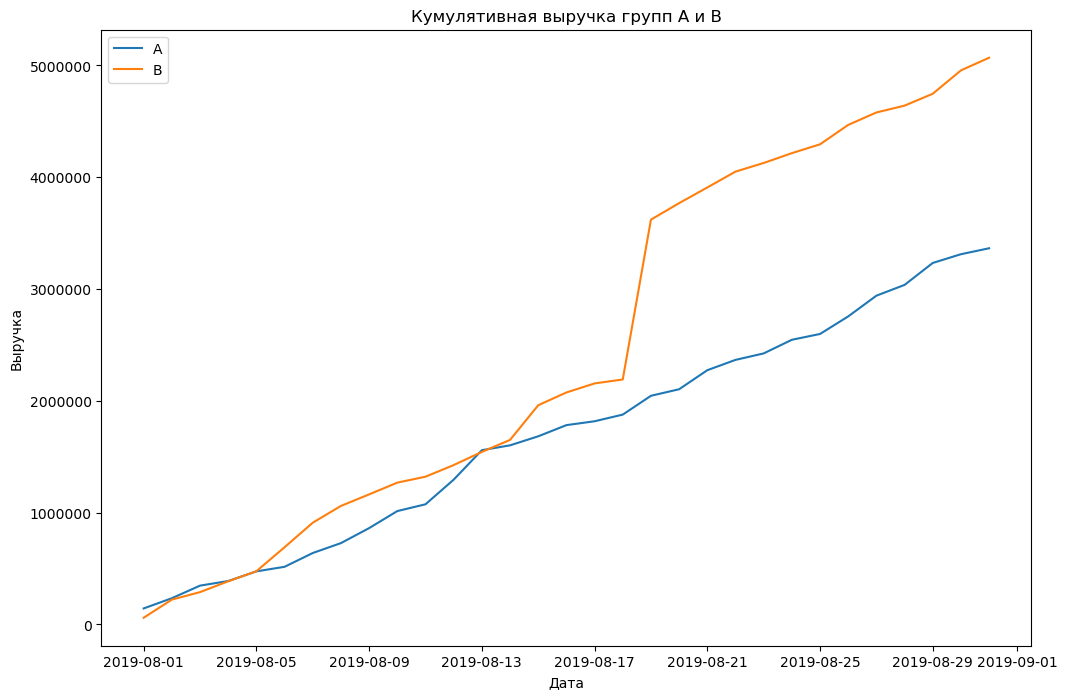

In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Создаем новый график с заданным размером
plt.figure(figsize=(12, 8))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

# Подписываем оси
plt.xlabel('Дата')
plt.ylabel('Выручка')
# Даем название графику
plt.title('Кумулятивная выручка групп A и B')
# Отключаем научную нотацию
plt.ticklabel_format(style='plain', axis='y')
# Показать график
plt.show()

**Выручка в процессе проведения A/B теста сначала увеличивалась равномерно приблизительно в течение полмесяца, а во вторую половину августа у группы B она росла намного более бытрыми темпами, чем у группы A. График выручки группы B в одной точке в районе 18.08.2019 резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Также подобный рост есть у группы A 11.08.2019.**

**Построим графики среднего чека по группам:**

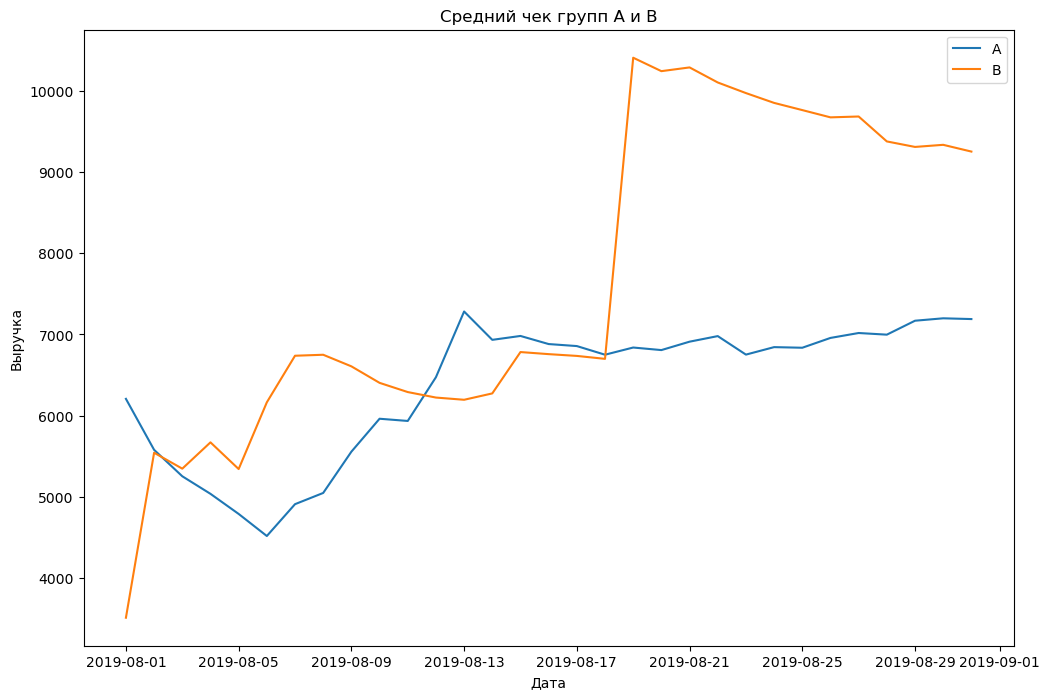

In [32]:
# Создаем новый график с заданным размером
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
# Подписываем оси
plt.xlabel('Дата')
plt.ylabel('Выручка')
# Даем название графику
plt.title('Средний чек групп A и B')

# Показать график
plt.show()

**По полученному графику мы видим, что показатель среднего чека сильно колеблется в обеих группах. 18.09 в группе В виден скачок графика, что скорее всего объясняется попаданием в выборку аномально дорогих заказов, хотя и в целом средний чек группы В разительно отличается от среднего чека группы А: ближе к концу теста средний чек группы А колеблется в районе 7000, в то время как средний чек группы В устанавливается в районе от 9000 до 10000. Но проблема в том, что после такого сильного всплеска чек группы В начинает стабильно падать, в то время как у группы А чек к концу теста наоборот начинает плавно расти. По этому графику создается впечатление, что нужно больше данных, чтобы суметь проанализировать различия между группами точнее и как можно адекватнее.**

**Построим график относительного различия для среднего чека:**

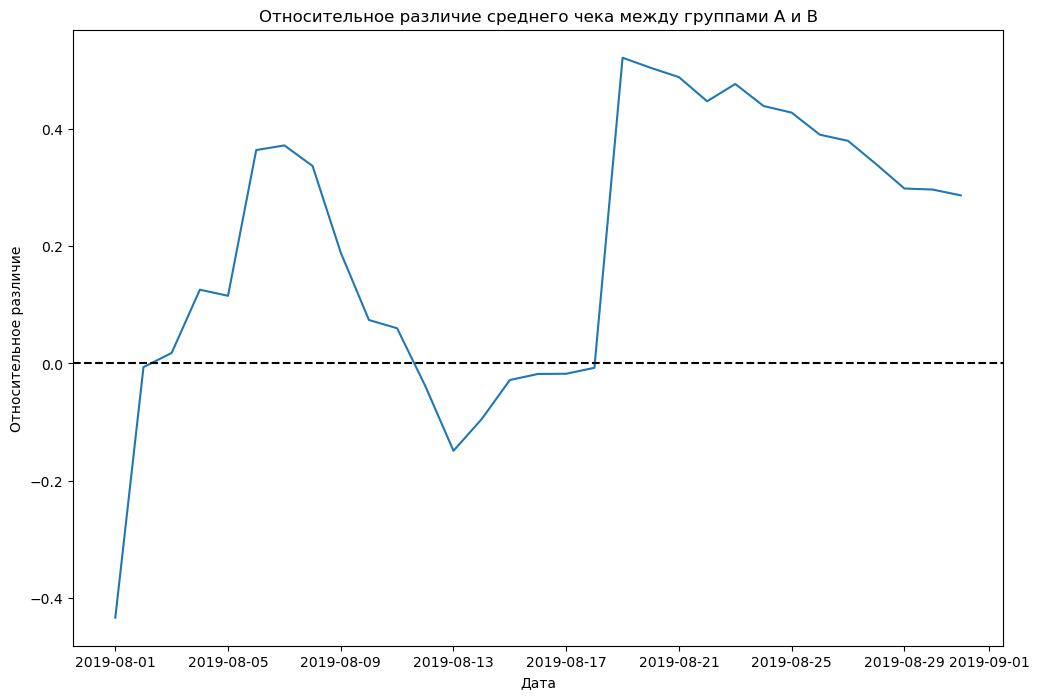

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
# Подписываем оси
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
# Даем название графику
plt.title('Относительное различие среднего чека между группами A и B')

# Показать график
plt.show()

**Мы можем сделать вывод, что преимущественно на протяжении проведения A/B теста по сумме среднего чека лидировала группа В, а группа А выигрывала по среднему чеку только несколько дней за весь месяц.**

**Построим график кумулятивного среднего количества заказов на посетителя по группам:**

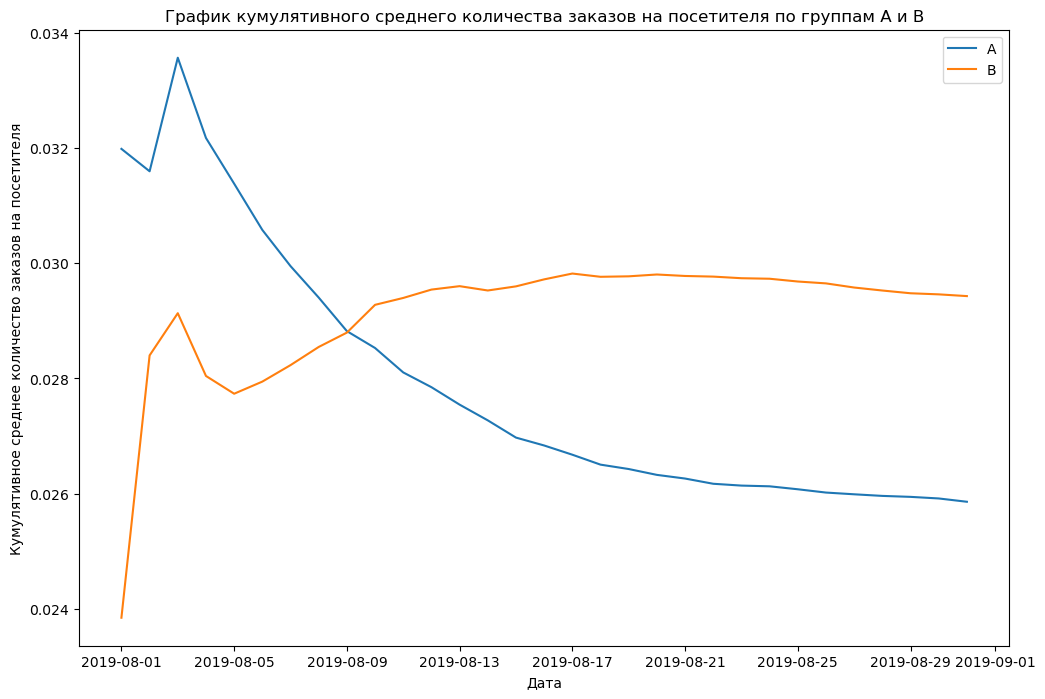

In [34]:
# Отключить все предупреждения
warnings.filterwarnings("ignore")
# Рассчитываем кумулятивное количество заказов и посетителей для группы A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataA['cumulative_orders'] = cumulativeDataA['orders'].cumsum()
cumulativeDataA['cumulative_visitors'] = cumulativeDataA['visitors'].cumsum()

# Рассчитываем кумулятивное количество заказов и посетителей для группы B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
cumulativeDataB['cumulative_orders'] = cumulativeDataB['orders'].cumsum()
cumulativeDataB['cumulative_visitors'] = cumulativeDataB['visitors'].cumsum()

# Рассчитываем кумулятивное среднее количество заказов на посетителя
cumulativeDataA['cumulative_average_orders_per_visitor'] = cumulativeDataA['cumulative_orders'] / cumulativeDataA['cumulative_visitors']
cumulativeDataB['cumulative_average_orders_per_visitor'] = cumulativeDataB['cumulative_orders'] / cumulativeDataB['cumulative_visitors']

# Создаем новый график с заданным размером
plt.figure(figsize=(12, 8))

# Строим графики для групп A и B
plt.plot(cumulativeDataA['date'], cumulativeDataA['cumulative_average_orders_per_visitor'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['cumulative_average_orders_per_visitor'], label='B')

plt.legend()

# Подписываем оси
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')

# Даем название графику
plt.title('График кумулятивного среднего количества заказов на посетителя по группам A и B')

# Показать график
plt.show()


**Итак, графики среднего количества заказов тоже получились очень различными в группе А и в группе В. В группе А во второй половине срока проведения теста установилось значение в районе 0.026, а для группы В - значение приблизительно равное 0.029. Т.е. выходит, что среднее количество заказов на пользователя больше в группе В.**

**Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:**

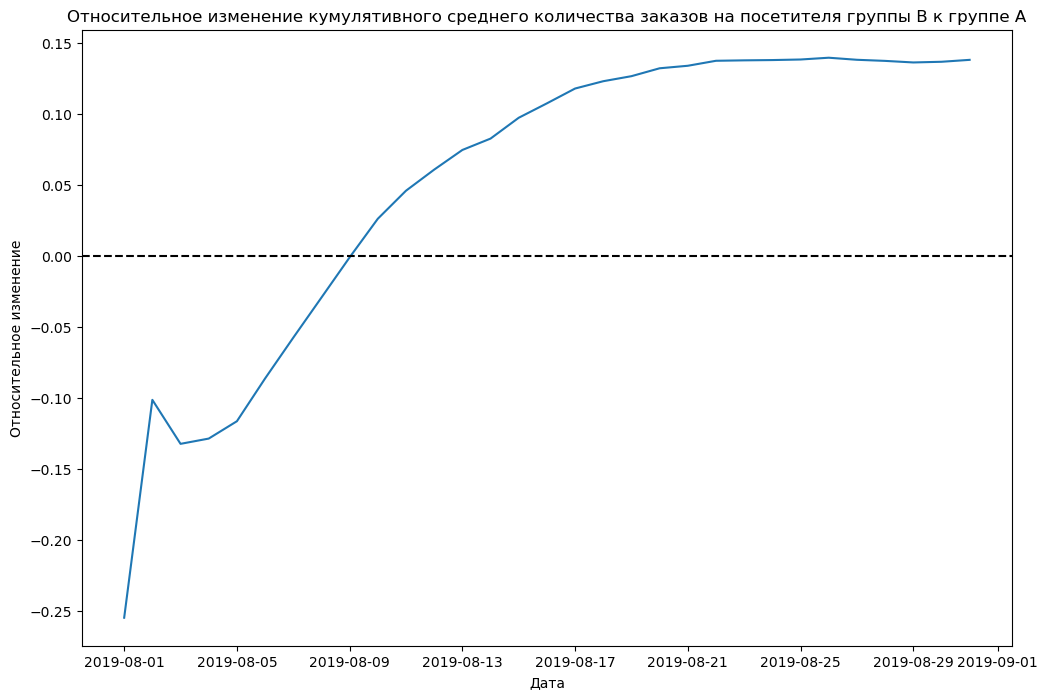

In [35]:
# Собираем данные в одном датафрейме
mergedCumulativeAverageOrders = cumulativeDataA.merge(cumulativeDataB, on='date', suffixes=['A', 'B'])

plt.figure(figsize=(12, 8))

# Строим график относительного изменения кумулятивного среднего количества заказов на посетителя
plt.plot(mergedCumulativeAverageOrders['date'], (mergedCumulativeAverageOrders['cumulative_average_orders_per_visitorB'] / mergedCumulativeAverageOrders['cumulative_average_orders_per_visitorA']) - 1)

# Добавляем горизонтальную линию на уровне 0
plt.axhline(y=0, color='black', linestyle='--')

# Подписываем оси
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

# Показать график
plt.show()

**По графику мы установили, что в начале теста группа B значительно проигрывала группе A по среднему количеству заказов на посетителя, а затем вырвалась вперёд и потом уже удерживала лидирующую позицию до окончания теста.**

**Построим точечный график количества заказов по пользователям:**

In [36]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


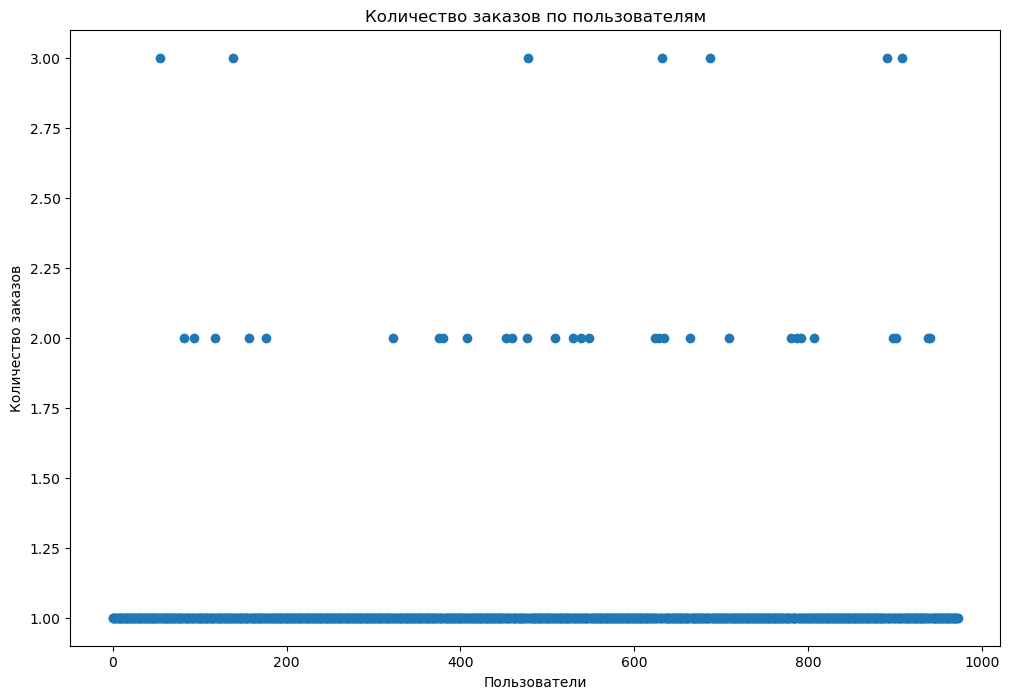

In [37]:
plt.figure(figsize=(12, 8))
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
# Добавляем заголовок графика
plt.title('Количество заказов по пользователям')

# Подписываем оси
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

# Показать график
plt.show()

**На основании точечного графика количества заказов по пользователям можно сделать вывод, что больше всего пользователей, сделавших один заказ, но также много и тех, у кого по два заказа. Самое большое количество заказов на пользователя - по 3 штуки. В целом покупателей, сделавших больше двух заказов, очень мало.**

**Посчитаем 95-й и 99-й перцентили стоимости заказов:**

In [38]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Не более 5% пользователей оформляли более одного заказа и не более 1% пользователей покупали более двух раз. Будет уместным выбрать в качестве верхней границы 2 заказа на пользователя, а аномальных пользователей можно отсеять.**

**Построим точечный график стоимостей заказов:**

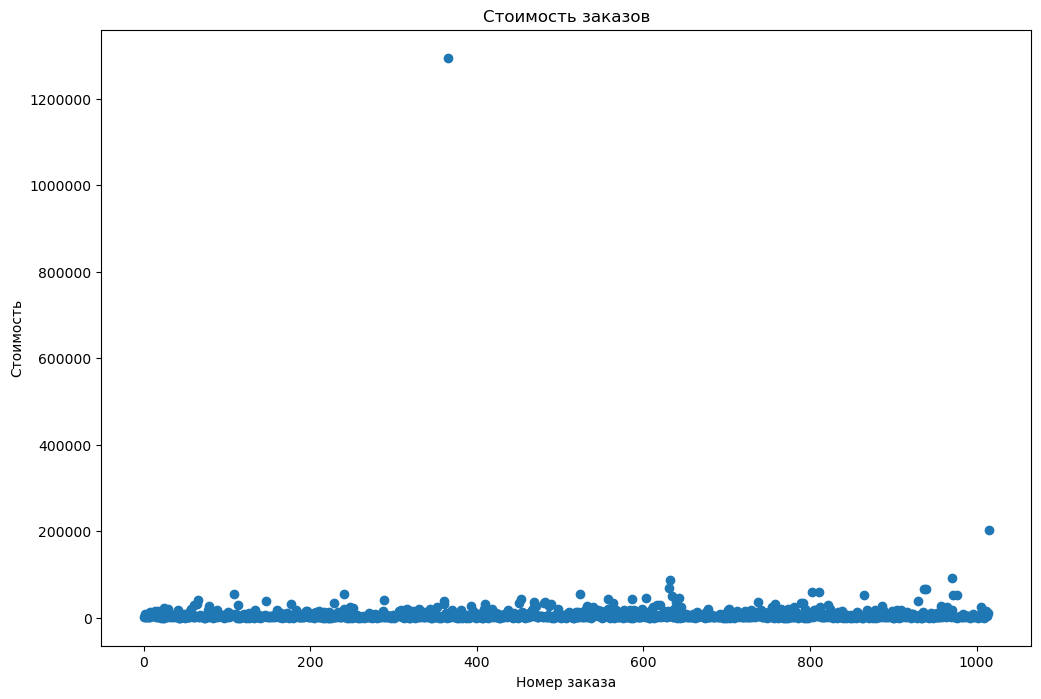

In [39]:
plt.figure(figsize=(12, 8))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
# Добавляем заголовок графика
plt.title('Стоимость заказов')

# Подписываем оси
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость')
# Установка формата чисел на оси Y в обычные десятичные числа
plt.ticklabel_format(style='plain', axis='y')
# Показать график
plt.show()

**Мы видим, что большинство заказов бывают до 100 000 рублей, а заказы от 100 000 и дороже являются аномально редкими.**

**Посчитаем 95-й и 99-й перцентили стоимости заказов:**

In [40]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Только 5% от всех заказов дороже 26 785 руб. и только 1% заказов составил более 53 904 руб. Будем считать заказы дороже 50 000 руб. аномальными, их можно будет в дальнейшем убрать из исследования.**

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:**

**Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.**

In [41]:
#подготовим данные, создадим таблицу "data"
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [42]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("Значение p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительная разница группы B к группе A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


Значение p-value: 0.011
Относительная разница группы B к группе A: 0.160


**Выходит, что по "сырым данным" получается, что различия между группами А и В есть, так как p-value меньше 0.05. Значит, нулевую гипотезу, что статистически значимых различий в среднем числе заказов между группами нет, мы можем отвергнуть. Относительный выигрыш группы B равен 16%.**

**Теперь проверим статистическую значимость различий в среднем чеке между сегментами по "сырым" данным. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.**

In [43]:
print('Значение p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница группы B к группе A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value: 0.829
Относительная разница группы B к группе A: 0.287


**Наблюдаемое различие в превышении среднего чека группы В над средним чеком группы А в 28.7% не является статистически значимым, так как у нас получился p-value, который значительно превышает 0.05. Значит у нас нет оснований отвергать нулевую гипотезу об отсутствии различий в среднем чеке.**

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:**

**Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 50 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.**

In [44]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers)
print(abnormalUsers.shape[0])

1099     148427295
33       249864742
58       611059232
1137     759473111
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
287     2254456485
131     2254586615
1006    2261934787
1142    2606908679
347     2742574263
310     2988190573
409     3908431265
613     3931967268
416     3967698036
940     4003628586
743     4133034833
Name: visitorId, dtype: int64
22


**Всего у нас получилось 22 аномальных пользователя. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным:**

In [45]:
#подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [46]:
print('Значение p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница группы B к группе A: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение p-value: 0.006
Относительная разница группы B к группе A: 0.198


**Результаты по среднему количеству заказов практически не изменились. Отвергаем нулевую гипотезу. Количество заказов на пользователя в группе В преобладает на 19.8%. Теперь проверим, произошло ли что-нибудь с результатами по среднему чеку:**

In [47]:
print(
    'Значение p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительная разница группы B к группе A: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение p-value: 0.939
Относительная разница группы B к группе A: 0.011


**P-value увеличился, и очень сильно изменилась разница между сегментами: по "очищенным данным" у нас выходит, что группа В выигрывает у группы А по среднему чеку всего лишь на 1%. Но так как p-value намного больше уровня статистической значимости, мы не отвергает нулевую гипотезу и будем считать обнаруженные различия статистически незначимыми.**

**Теперь нам следует принять решение, следует ли остановить или продолжить A/B тест. Нам удалось установить следующее:<br>
-Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий. Группа В превосходит группу А на 19.8% по очищенным данным;<br>
-Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;<br>
-График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A демонстрирует, что группа В выигрывает у группы А;<br>
-График относительного различия для среднего чека показывает, что группа B преимущественно лидировала по этому показателю.<br>
Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Мы обоснованно можем считать сегмент В превосходящим сегмент А по количеству заказов на пользователя. Статистически значимые различия по среднему чеку между группами А и В отсутствуют.**

**Общий вывод:<br>
Нами был подготовлен и проверен список гипотез для увеличения выручки интернет-магазина. Для этого сначала мы провели предобработку данных: изменили типы и названия столбцов, проверили данные на наличие пропусков и дубликатов.<br>
Затем мы перешли к приоритизации гипотез с использованием фреймворков ICE и RICE и установили, что нам стоит проверить гипотезы под номерами 7, 0 и 6, как самые перспективные.<br>
Далее мы перешли к работе с данными по результам A/B тестирования. Мы установили что A/B тест проводился с 1 по 31 августа 2019 года. По результатам построения графиком мы получили следующие выводы:<br>
1). Выручка в процессе проведения A/B теста сначала увеличивалась равномерно приблизительно в течение полмесяца, а во вторую половину августа у группы B она росла намного более бытрыми темпами, чем у группы A. График выручки группы B в одной точке в районе 18.08.2019 резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Также подобный рост есть у группы A 11.08.2019.<br>
2). Показатель среднего чека сильно колеблется в обеих группах. 18.09.2019 в группе В виден скачок графика, что скорее всего объясняется попаданием в выборку аномально дорогих заказов, хотя и в целом средний чек группы В разительно отличается от среднего чека группы А: ближе к концу теста средний чек группы А колеблется в районе 7000, в то время как средний чек группы В устанавливается в районе от 9000 до 10000. Но проблема в том, что после такого сильного всплеска чек группы В начинает стабильно падать, в то время как у группы А чек к концу теста наоборот начинает плавно расти.<br>
3). Преимущественно на протяжении проведения A/B теста по сумме среднего чека лидировала группа В, а группа А выигрывала по среднему чеку только несколько дней за весь месяц.<br>
4). Итак, графики среднего количества заказов тоже получились очень различными в группе А и в группе В. В группе А во второй половине срока проведения теста установилось значение в районе 0.026, а для группы В - значение приблизительно равное 0.029. Т.е. выходит, что среднее количество заказов на пользователя больше в группе В.<br>
5). В начале теста группа B значительно проигрывала группе A по среднему количеству заказов на посетителя, а затем вырвалась вперёд и потом уже удерживала лидирующую позицию до окончания теста.<br>
6). На основании точечного графика количества заказов по пользователям можно сделать вывод, что больше всего пользователей, сделавших один заказ, но также много и тех, у кого по два заказа. Самое большое количество заказов на пользователя - по 3 штуки. В целом покупателей, сделавших больше двух заказов, очень мало.<br>
7). Не более 5% пользователей оформляли более одного заказа и не более 1% пользователей покупали более двух раз.<br>
8). Мы увидели по точечному графику, что большинство заказов бывают до 100 000 рублей, а заказы от 100 000 и дороже являются аномально редкими.<br>
9). Только 5% от всех заказов дороже 26 785 руб. и только 1% заказов составил более 53 904 руб.<br>
10). По "сырым данным" получается, что различия между группами А и В есть, так как p-value меньше 0.05. Значит, нулевую гипотезу, что статистически значимых различий в среднем числе заказов между группами нет, мы можем отвергнуть. Относительный выигрыш группы B равен 16%.<br>
11). Наблюдаемое различие в превышении среднего чека группы В над средним чеком группы А в 28.7% не является статистически значимым, так как у нас получился p-value, который значительно превышает 0.05. Значит у нас нет оснований отвергать нулевую гипотезу об отсутствии различий в среднем чеке.<br>
12). Далее мы приняли за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 50 000 рублей. Так мы убрали 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами и перешли к подсчету статистической значимости по "очищенным" данным.<br>
13). Результаты по среднему количеству заказов практически не изменились. Отвергаем нулевую гипотезу. Количество заказов на пользователя в группе В преобладает на 19.8%<br>
14). При исследовании среднего чека мы установили, что p-value увеличился, и очень сильно изменилась разница между сегментами: по "очищенным данным" у нас выходит, что группа В выигрывает у группы А по среднему чеку всего лишь на 1%. Но так как p-value намного больше уровня статистической значимости, мы не отвергает нулевую гипотезу и будем считать обнаруженные различия статистически незначимыми.<br>
15). На основе анализа результатов A/B теста мы приняли решение что тест следует остановить и признать его успешным. Мы обоснованно можем считать сегмент В превосходящим сегмент А по количеству заказов на пользователя. Статистически значимые различия по среднему чеку между группами А и В отсутствуют.**